# $m_{hh}$ shape syst 

**Goal:** Try to understand this RoI from 400 - 700 GeV.

<img src="figures/pairAGraph_shapeSyst.png" width=400>

The biggest concern I had atm was whether the jet selection of pairAGraph could be doing something more different between these two regions? 

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product

import matplotlib.pyplot as plt
from matplotlib import gridspec
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.preprocessing import StandardScaler

import os
os.sys.path.append('../code')
from plotting import SR_x, SR_y1, SR_y2
from plotting import CR_x, CR_y1, CR_y2
from plotting import SB_x, SB_y1, SB_y2
from eventDisplays import rainbow_text

%load_ext autoreload
%autoreload 2

Running w/ conda env: don't import root packages.


Let's start w/ just loading in *one* file at first.

In [2]:
in_dir = '../data/data16_PFlow-FEB20-5jets'

dfi_2b = pd.read_hdf(f'{in_dir}/files/df_periodA_000001_SM_2b_even_2b.h5')
dfi_3b = pd.read_hdf(f'{in_dir}/df_SM_2b_even_3b.h5')

In [1]:
# %%bash
# ls ../data/data16_PFlow-FEB20-5jets/files/

In [4]:
dfi_2b.head()

run_number  event_number  mc_sf  ntag  njets  kinematic_region  \
entry                                                                   
27         297730       4565946      1     2      4                -1   
33         297730       4525200      1     2      5                -1   
47         297730       4011449      1     2      4                -1   
51         297730       5529312      1     2      5                -1   
55         297730       5097880      1     2      4                -1   

             m_hh      pt_hh      X_wt     m_hh_cor  ...  ml_j3_Db  ml_j4_Db  \
entry                                                ...                       
27     399.662144  20.178557  1.863553   606.825372  ...       2.0       0.0   
33     575.906369  49.722524  6.019844  1485.793368  ...      -2.0      -2.0   
47     796.327397  71.476869  6.799198   339.957130  ...      -2.0       0.0   
51     302.048954  69.165715  1.589287   836.299696  ...       2.0      -2.0   
55     499.496678  16.851858  7.413063   598.721634  ...       1.0       0.0   

       idx_HC0_j0  idx_HC0_j1  idx_HC1_j0  idx_HC1_j1          HT    MDR  \
entry                                                                      
27              0           3           1           2  231.488327   True   
33              0           2           1           3  364.397270   True   
47              0           1           2           3  591.038170  False   
51              2           3           1           4  255.237747  False   
55              0           2           1           3  331.277447  False   

        MDpT  max_prob  
entry                   
27     False  0.994797  
33      True  0.641600  
47     False  0.734328  
51      True  0.506322  
55     False  0.996609  

[5 rows x 45 columns]

In [5]:
for c in dfi_2b:
    print(c)

run_number
event_number
mc_sf
ntag
njets
kinematic_region
m_hh
pt_hh
X_wt
m_hh_cor
pT_h1
eta_h1
phi_h1
m_h1
dRjj_h1
dPhi_h1
pT_h2
eta_h2
phi_h2
m_h2
dRjj_h2
dPhi_h2
pT_2
pT_4
eta_i
dRjj_1
dRjj_2
cosThetaStar
cosTheta1
cosTheta2
Phi
Phi1
ml_j0_Db
ml_j1_Db
ml_j2_Db
ml_j3_Db
ml_j4_Db
idx_HC0_j0
idx_HC0_j1
idx_HC1_j0
idx_HC1_j1
HT
MDR
MDpT
max_prob


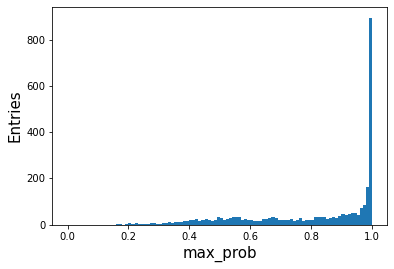

In [6]:
plt.hist(dfi_2b.max_prob,100,(0,1))
plt.xlabel('max_prob',fontsize=15)
plt.ylabel('Entries',fontsize=15)
plt.show()

Ok, I decided I needed new samples, so submitted Wed morning (16th Sept).

In [7]:
cols = ['idx_HC0_j0','idx_HC0_j1','idx_HC1_j0','idx_HC1_j1']
cols+= ['ml_j0_Db','ml_j1_Db','ml_j2_Db','ml_j3_Db','ml_j4_Db']

In [8]:
dfi_2b[cols]

idx_HC0_j0  idx_HC0_j1  idx_HC1_j0  idx_HC1_j1  ml_j0_Db  ml_j1_Db  \
entry                                                                       
27              0           3           1           2       0.0      -2.0   
33              0           2           1           3       2.0      -2.0   
47              0           1           2           3       2.0      -2.0   
51              2           3           1           4      -2.0      -2.0   
55              0           2           1           3      -2.0       2.0   
...           ...         ...         ...         ...       ...       ...   
25779           0           2           1           3       2.0      -2.0   
25783           0           1           2           4      -2.0      -2.0   
25813           0           2           3           4       2.0      -2.0   
25815           0           3           1           2      -2.0       1.0   
25823           0           3           1           2      -2.0       2.0   

       ml_j2_Db  ml_j3_Db  ml_j4_Db  
entry                                
27         -2.0       2.0       0.0  
33          2.0      -2.0      -2.0  
47          1.0      -2.0       0.0  
51          0.0       2.0      -2.0  
55         -2.0       1.0       0.0  
...         ...       ...       ...  
25779       2.0      -2.0       0.0  
25783       2.0      -2.0       2.0  
25813      -2.0       2.0      -2.0  
25815       2.0      -2.0       0.0  
25823       2.0      -2.0       0.0  

[2848 rows x 9 columns]

- Retrieve the Dbs for the selected jets
- Apply a mask as $\geq$ 2 (which corresponds to the 77% WP)

In [9]:
# idx_cols = 

In [10]:
hc_Dbs = ['Db_HC0_j0','Db_HC0_j1','Db_HC1_j0','Db_HC1_j1']

for dfi in [dfi_2b, dfi_3b]:

    nEvts = len(dfi)

    idx = dfi[['idx_HC0_j0','idx_HC0_j1','idx_HC1_j0','idx_HC1_j1']].values
    Dbs = dfi[['ml_j0_Db','ml_j1_Db','ml_j2_Db','ml_j3_Db','ml_j4_Db']].values

    for i,c in enumerate(hc_Dbs):
        dfi[c] = Dbs[np.arange(nEvts),idx[:,i]]


In [11]:
# 2 tag
Db_sel = dfi_2b[hc_Dbs].values
sel2b = np.sum(np.sum(Db_sel >= 0,axis=1)==2)

print('choose 2bs:',sel2b/Db_sel.shape[0])

choose 2bs: 0.9929775280898876


For 2b events, pairAGraph selects the b-tag events 99.3% of the time.

It would be interesting to make event displays of the other events as well, no, or at least look @ their properties

(I.e, H_T, m_hh and what kinematic region they fall into.)

In [12]:
dfi_2b[np.sum(Db_sel >= 0,axis=1)<2]

run_number  event_number  mc_sf  ntag  njets  kinematic_region  \
entry                                                                   
719        297730      39914933      1     2      5                 2   
747        297730      46284838      1     2      5                -1   
1263       297730      93086176      1     2      5                -1   
1843       297730      55265043      1     2      5                 0   
4129       297730     223782273      1     2      5                -1   
4681       297730     255615485      1     2      5                -1   
5659       297730     314116360      1     2      5                -1   
9909       297730      76004332      1     2      5                -1   
11447      297730      80843186      1     2      5                -1   
13463      297730     192728005      1     2      5                -1   
14421      297730     281432581      1     2      5                -1   
14557      297730     311442105      1     2      5                -1   
15257      297730     156501879      1     2      5                -1   
16319      297730     236444175      1     2      5                -1   
16695      297730     157770524      1     2      5                -1   
17371      297730     177212414      1     2      5                -1   
18217      297730     284627791      1     2      5                 2   
18583      297730     296738432      1     2      5                -1   
24287      297730      73937840      1     2      5                -1   
25475      297730     264443605      1     2      5                -1   

              m_hh       pt_hh      X_wt     m_hh_cor  ...  idx_HC1_j0  \
entry                                                  ...               
719    1052.020081   74.504752  4.948626  1061.032853  ...           1   
747     447.213636  192.541281  6.942174   861.109945  ...           3   
1263    590.633991  334.756059  5.186285   746.692793  ...           2   
1843    401.664298  144.965637  4.380598   422.521649  ...           3   
4129    331.640182  131.163972  3.809486   460.177381  ...           1   
4681    986.605567  140.616665  6.146711   662.953592  ...           1   
5659    417.441386   41.736671  2.038235   634.709421  ...           1   
9909    220.904632  216.020733  1.618957   530.571594  ...           2   
11447   351.956181   54.697007  1.684988   497.696396  ...           2   
13463   316.368785  148.352982  2.086917   546.257862  ...           2   
14421   469.320180  132.625312  4.647105   700.380233  ...           2   
14557   411.540915  195.810659  5.424648   461.406840  ...           3   
15257   181.904325  163.379999  2.649045   509.002157  ...           2   
16319   359.513155   44.690490  2.041196   866.941308  ...           1   
16695   341.351264   34.886388  2.926266   733.518542  ...           2   
17371   291.968902   47.228662  3.454829   779.261009  ...           0   
18217   371.352764  285.598243  1.580848   439.884421  ...           2   
18583   720.326394  105.852420  3.026361   457.142093  ...           1   
24287  1146.814181   91.707414  5.725383   500.783746  ...           0   
25475   354.101780   76.852146  4.986599  1290.511612  ...           3   

       idx_HC1_j1           HT    MDR   MDpT  max_prob  Db_HC0_j0  Db_HC0_j1  \
entry                                                                          
719             2  1022.400848   True   True  0.444119        2.0       -2.0   
747             4   417.517429   True   True  0.885523        2.0       -2.0   
1263            4   474.075813   True   True  0.912070        2.0       -2.0   
1843            4   297.456009   True   True  0.426941       -2.0       -2.0   
4129            3   324.595947   True   True  0.822257       -2.0       -2.0   
4681            2   907.100174   True   True  0.998178       -2.0        2.0   
5659            3   370.557049   True   True  0.245283       -2.0       -2.0   
9909            4   303.561329  False   True  0.234

In [13]:
plt.hist(dfi_2b[np.sum(Db_sel >= 0,axis=1)<2].m_hh,100,(0,1200))
plt.show()

In [14]:
# 3 tag

Db_sel = dfi_3b[hc_Dbs].values
sel3b = np.sum( (np.sum((Db_sel >= 0),axis=1)==3) & (dfi_3b.ntag==3))

print('choose 3bs:',sel3b/np.sum(dfi_3b.ntag==3))

choose 3bs: 0.9658852852291492


In [15]:
dfi_3b[(np.sum((Db_sel >= 0),axis=1)<3) & (dfi_3b.ntag==3)]

run_number  event_number  mc_sf  ntag  njets  kinematic_region  \
entry                                                                    
1065        304178     543425064      1     3      5                 2   
2685        304178     547538236      1     3      5                 2   
3137        304178     551687418      1     3      5                -1   
6723        304178     587768330      1     3      5                -1   
7919        304178     594710008      1     3      5                -1   
...            ...           ...    ...   ...    ...               ...   
556879      309516    1827164392      1     3      5                -1   
557067      309516    2608580773      1     3      5                 0   
558073      309516    3364575392      1     3      5                -1   
558155      309516    3376699651      1     3      5                -1   
559473      309516    3379591342      1     3      5                 2   

              m_hh       pt_hh      X_wt     m_hh_cor  ...  idx_HC1_j0  \
entry                                                  ...               
1065    556.483371  289.513705  4.376679   494.832028  ...           3   
2685    862.507388  194.076207  0.717348   927.022498  ...           2   
3137    339.015957   46.247777  3.888163   575.939337  ...           3   
6723    614.805666  159.751661  4.214345   864.489733  ...           1   
7919    851.267801  554.905996  9.370891  1022.949889  ...           2   
...            ...         ...       ...          ...  ...         ...   
556879  320.074971  123.772771  2.509202   382.180660  ...           2   
557067  461.444015   47.964989  1.910295   457.628941  ...           3   
558073  463.767193   21.331100  2.427852   652.415159  ...           0   
558155  309.931202  388.710580  1.001407   476.572407  ...           4   
559473  566.668974   77.140589  4.353552   527.557381  ...           1   

        idx_HC1_j1          HT    MDR   MDpT  max_prob  Db_HC0_j0  Db_HC0_j1  \
entry                                                                          
1065             2  558.517609   True   True  0.833470       -2.0       -2.0   
2685             3  431.614315  False  False  0.708948        2.0       -2.0   
3137             4  241.623032   True   True  0.504735       -2.0        0.0   
6723             2  593.162109   True   True  0.802648       -2.0        1.0   
7919             3  730.102020   True   True  0.990003        2.0       -2.0   
...            ...         ...    ...    ...       ...        ...        ...   
556879           3  283.296284   True   True  0.269053        1.0       -2.0   
557067           1  432.101349   True   True  0.757737        1.0       -2.0   
558073           3  298.282848   True   True  0.311729        0.0        2.0   
558155           3  478.082359  False   True  0.399749        2.0       -2.0   
559473           4  465.151505   True   True  0.903958        2.0        2.0   

        Db_HC1_j0  Db_HC1_j1  
entry                         
1065          2.0        0.0  
2685         -2.0        2.0  
3137          0.0       -2.0  
6723         -2.0        1.0  
7919          2.0       -2.0  
...           ...        ...  
556879       -2.0        2.0  
557067        0.0       -2.0  
558073       -2.0       -2.0  
558155        2.0       -2.0  
559473       -2.0       -2.0  

[109498 rows x 49 columns]

In [16]:
# 3 tag
sel3b = np.sum( (np.sum((Db_sel >= 0),axis=1)==4) & (dfi_3b.ntag>=4))

print('choose 4bs:',sel3b/np.sum(dfi_3b.ntag>=4))

choose 4bs: 0.9025211344663878


And... 90% is *significant*.

In [17]:
np.sum(dfi_3b.ntag==4)/np.sum(dfi_3b.ntag>=4)

0.9856603307389562

Ok, there's a problem in the training, pairAGraph isn't even learning how to select the right events... ugh.

In [18]:
dfi_3b[(np.sum((Db_sel >= 0),axis=1)<4) & (dfi_3b.ntag==4)]

run_number  event_number  mc_sf  ntag  njets  kinematic_region  \
entry                                                                    
1319        304178     546801926      1     4      5                -1   
6017        304178     590983268      1     4      5                -1   
11031       304178     601302415      1     4      5                -1   
37841       304178     696334119      1     4      5                -1   
37945       304178     693109137      1     4      5                 1   
...            ...           ...    ...   ...    ...               ...   
523463      309516    2737789972      1     4      5                -1   
526963      309516    2791160163      1     4      5                 0   
541745      309516    3050836387      1     4      5                 2   
545197      309516    3127082394      1     4      5                 0   
555023      309516    3342904099      1     4      5                 2   

               m_hh       pt_hh      X_wt     m_hh_cor  ...  idx_HC1_j0  \
entry                                                   ...               
1319     378.886741   32.450704  1.367576   571.022623  ...           0   
6017     602.236651  121.406821  4.029373   553.345571  ...           1   
11031    306.474138  137.333332  1.559938   863.014839  ...           2   
37841    762.630312  161.977493  5.015613   617.076244  ...           3   
37945   1474.448864  214.048673  6.634917  1331.817999  ...           1   
...             ...         ...       ...          ...  ...         ...   
523463   408.622780  195.355264  2.655339   545.602719  ...           2   
526963   639.707820   27.710250  1.451541   761.709047  ...           1   
541745   476.615044  133.931449  1.417109   558.209777  ...           2   
545197   501.415005  156.711669  1.990239   533.656909  ...           1   
555023   665.811942   87.938620  4.265680   793.166214  ...           3   

        idx_HC1_j1           HT    MDR   MDpT  max_prob  Db_HC0_j0  Db_HC0_j1  \
entry                                                                           
1319             4   292.613926   True   True  0.579582        1.0       -2.0   
6017             4   510.277561  False   True  0.305559        1.0        2.0   
11031            3   330.351562  False   True  0.984018        2.0        2.0   
37841            4   639.703484  False  False  0.978742        2.0       -2.0   
37945            3  1348.924080   True   True  0.999925        2.0       -2.0   
...            ...          ...    ...    ...       ...        ...        ...   
523463           3   296.983265   True   True  0.426508        2.0       -2.0   
526963           2   302.042969  False  False  0.480067       -2.0        2.0   
541745           3   283.291237   True   True  0.885727       -2.0        0.0   
545197           3   503.681091   True   True  0.346897       -2.0        2.0   
555023           4   304.183666  False  False  0.873528        2.0        2.0   

        Db_HC1_j0  Db_HC1_j1  
entry                         
1319          2.0        2.0  
6017          2.0       -2.0  
11031         2.0       -2.0  
37841         2.0        2.0  
37945         2.0        2.0  
...           ...        ...  
523463        1.0        2.0  
526963        2.0        2.0  
541745        2.0        2.0  
545197        2.0        0.0  
555023       -2.0        0.0  

[22093 rows x 49 columns]

Let's look at the columns for these events that are *not* in the SR.

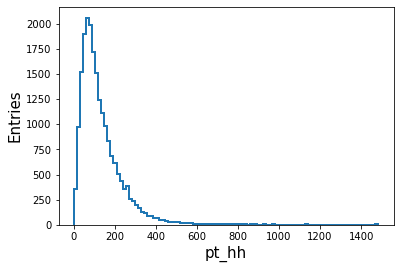

In [19]:
mask = (np.sum((Db_sel >= 0),axis=1)<4) & (dfi_3b.ntag==4) & (dfi_3b.kinematic_region!=0)

for c in ['m_hh','pt_hh','X_wt','m_hh_cor','cosThetaStar','HT','max_prob']:
    
    plt.figure()
    plt.hist(dfi_3b.loc[mask,c],100,histtype='step',linewidth=2)
    plt.xlabel(c,fontsize=15)
    plt.ylabel('Entries',fontsize=15)
    
plt.show()

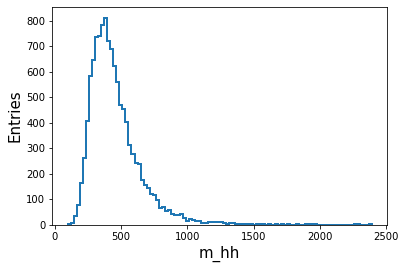

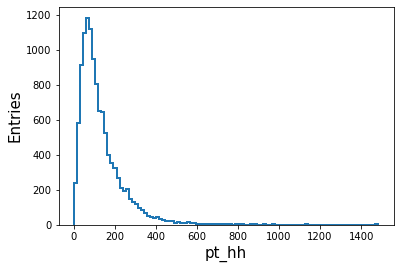

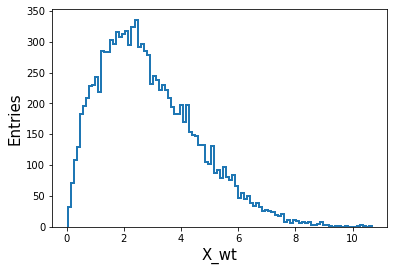

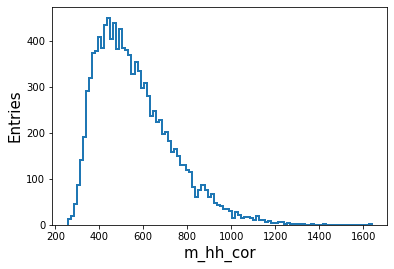

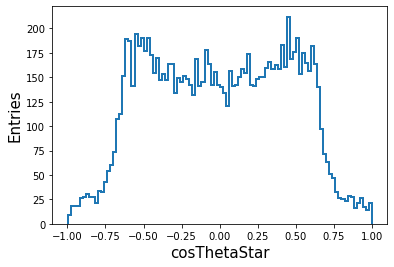

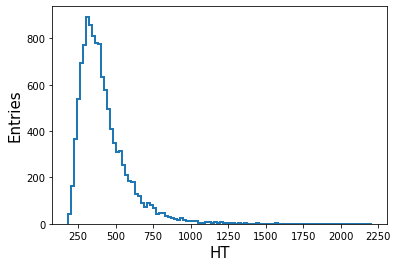

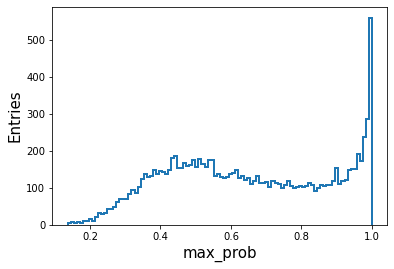

In [20]:
mask = (np.sum((Db_sel >= 0),axis=1)<4) & (dfi_3b.ntag==4) & (dfi_3b.kinematic_region!=0)
mask = mask & (np.abs(dfi_3b.eta_h1 -dfi_3b.eta_h2)<1.5)

for c in ['m_hh','pt_hh','X_wt','m_hh_cor','cosThetaStar','HT','max_prob']:
    
    plt.figure()
    plt.hist(dfi_3b.loc[mask,c],100,histtype='step',linewidth=2)
    plt.xlabel(c,fontsize=15)
    plt.ylabel('Entries',fontsize=15)
    
plt.show()

Interesting that a lot of these events will get eliminated by the $X_{wt}$ cut anyways.

**Plan:** 
1. Maybe look at these histograms before and after the $X_{wt}$ cut? 
2. Or look at the 4b events w/ and w/o the $b$-tag in HC requirement, and separately in the CR and VRs?

In [34]:
text = "$\mathbf{ATLAS}$ data Internal\n"
text += "2016 data FEB2020 MNT prod\n"
text += "DL1r 77% WP, pairAGraph with $|\Delta \eta_{hh}|$ < 1.5"

CR 0.8643247050537066
VR 0.858193770543121


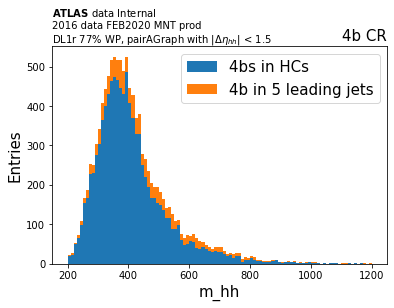

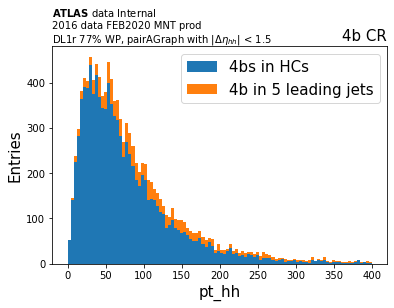

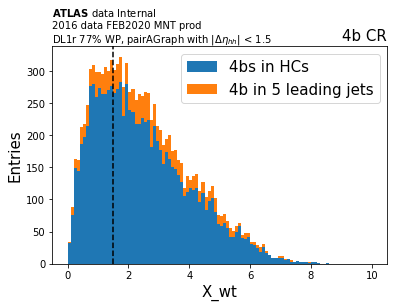

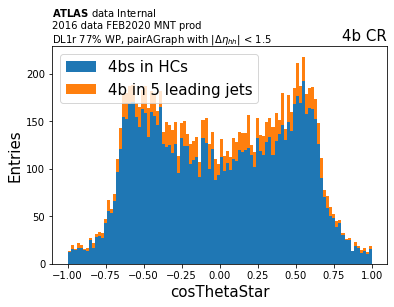

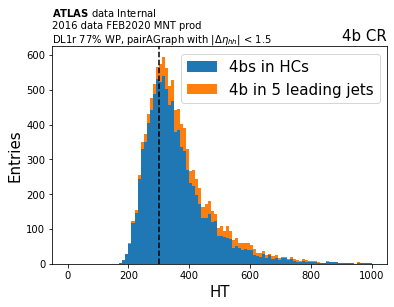

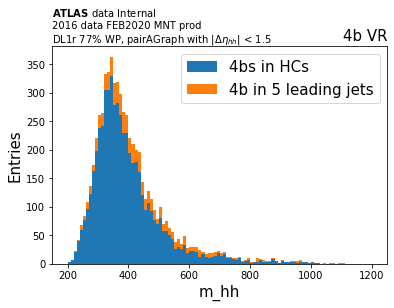

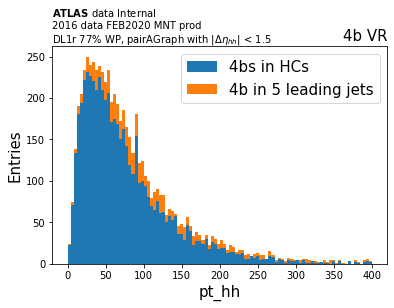

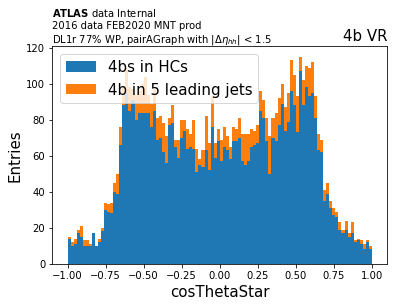

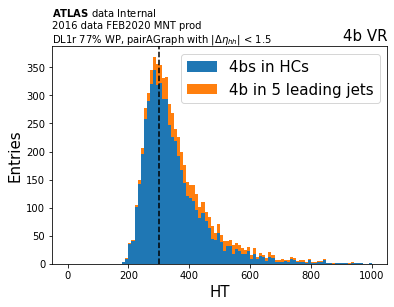

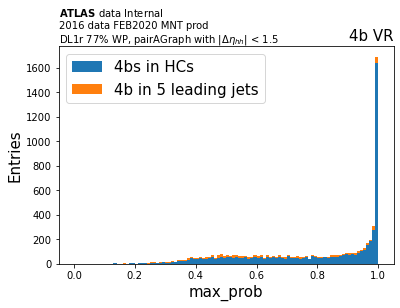

In [46]:
for k,kin_reg in zip([2,1],['CR','VR']):

    mask = (np.abs(dfi_3b.eta_h1 -dfi_3b.eta_h2)<1.5) & (dfi_3b.ntag>=4)  & (dfi_3b.kinematic_region==k)

    mask1 = mask & (np.sum((Db_sel >= 0),axis=1) == 4)
    mask2 = mask & (np.sum((Db_sel >= 0),axis=1)  < 4) 

    print(kin_reg,np.sum(mask1)/np.sum(mask))

    for c,r in zip(['m_hh','pt_hh','X_wt','m_hh_cor','cosThetaStar','HT','max_prob'],
                   [(200,1200),(0,400),(0,10),(250,1250),(-1,1),(0,1000),(0,1)]):

        plt.figure()
        plt.hist([dfi_3b.loc[mask1,c],dfi_3b.loc[mask2,c]],100,r,
                 label=['4bs in HCs','4b in 5 leading jets'],
                 histtype='bar',stacked=True)
        plt.xlabel(c,fontsize=15)
        plt.ylabel('Entries',fontsize=15)
        plt.title(f'4b {kin_reg}',fontsize=15,loc='right')
        plt.legend(fontsize=15)

        v = 1.5 if c == 'X_wt' else 300 if c=='HT' else None

        if not (v is None):
            ylim = plt.ylim()
            plt.plot([v]*2,ylim,'k--')
            plt.ylim(ylim)

        ax = plt.gca()
        plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)
        plt.savefig(f'figures/data16_PFlow-FEB20-5jets/SM_2b/{c}_{kin_reg}_4b_splitHCSel.pdf',bbox_inches='tight')
        
plt.show()

Maybe next I should make these for $H_T > 300$ and $X_{wt}>1.5$?

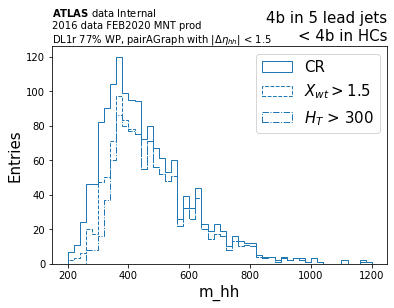

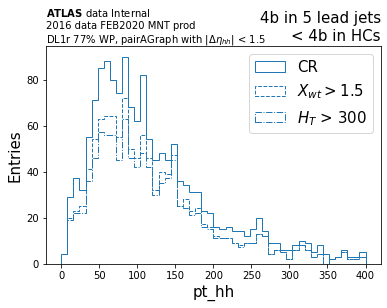

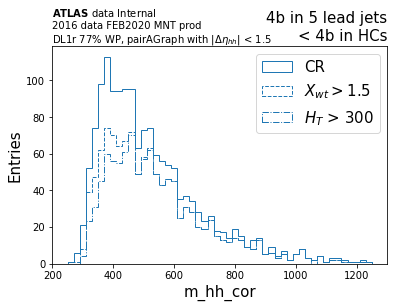

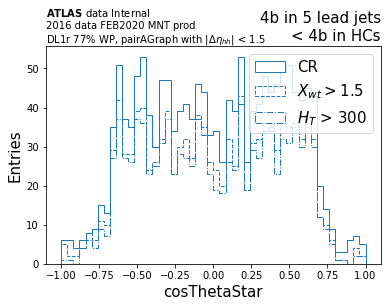

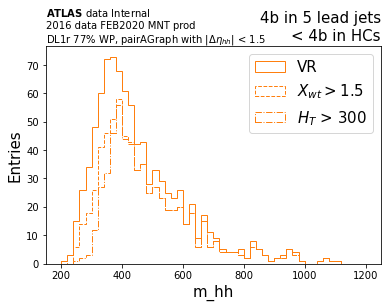

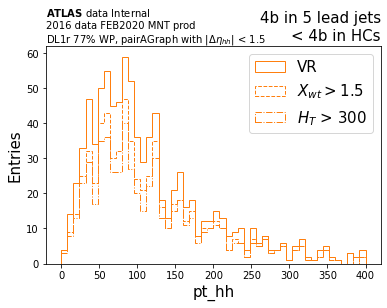

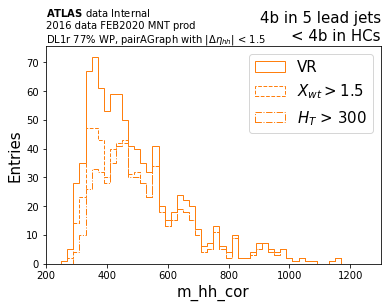

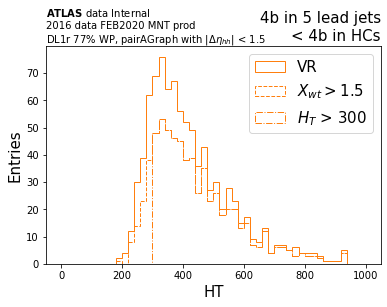

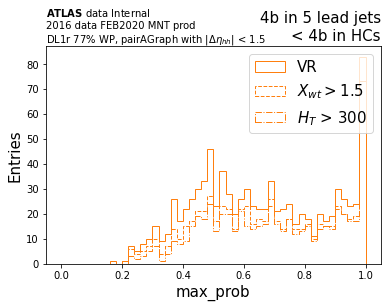

In [47]:
for k,kin_reg,color in zip([2,1],['CR','VR'],['C0','C1']):

    for i,(c,r) in enumerate(zip(['m_hh','pt_hh','X_wt','m_hh_cor','cosThetaStar','HT','max_prob'],
                                 [(200,1200),(0,400),(0,10),(250,1250),(-1,1),(0,1000),(0,1)])):

        plt.figure() # i+1
        mask = (np.abs(dfi_3b.eta_h1 -dfi_3b.eta_h2)<1.5) & (dfi_3b.ntag>=4) & (np.sum((Db_sel >= 0),axis=1)  < 4) 

        for cut, l,ls in zip([(dfi_3b.kinematic_region==k),(dfi_3b.X_wt > 1.5),(dfi.HT>300)],
                             [kin_reg,'$X_{wt}>1.5$','$H_T$ > 300'],['-','--','-.']):
        
            mask = mask & cut
            plt.hist(dfi_3b.loc[mask,c],50,r,ls=ls,
                     label=l,color=color, histtype='step')
            
        plt.xlabel(c,fontsize=15)
        plt.ylabel('Entries',fontsize=15)
        plt.title(f'4b in 5 lead jets\n< 4b in HCs',fontsize=15,loc='right')
        plt.legend(fontsize=15)

        ax = plt.gca()
        plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)
        
        plt.savefig(f'figures/data16_PFlow-FEB20-5jets/SM_2b/{c}_{kin_reg}_4b_notSelHC.pdf',bbox_inches='tight')
        
plt.show()

**Conclusions:** It's not the worst thing in the world if we select the 4bs that aren't in the HCs, but it is if this makes it harder to model.